# Python de cero a experto
**Autor:** Luis Miguel de la Cruz Salas

<a href="https://github.com/luiggix/Python_cero_a_experto">Python de cero a experto</a> by Luis M. de la Cruz Salas is licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

## Matplotlib
Es una biblioteca de Python multiplataforma para generar gráficos (plots) en dos dimensiones con las características: 
* Se puede usar en una variedad de ámbitos:
    - Scripts de Python, Shells de IPython, Notebooks de Jupyter, Aplicaciones para Web e Interfaces Gráficas de Usuario (GUI). 
* Se puede usar para desarrollar aplicaciones profesionales.
* Puede generar varios tipos de formatos de figuras y videos:
    - png, jpg, svg, pdf, mp4, ...
* Tiene un soporte limitado para realizar figuras en 3D.
* Puede combinarse con otras bibliotecas y aplicaciones para extender su funcionalidad.

**Arquitectura** de tres capas:
* **Scripting**: API para crear gráficas.
    - Provee de una interfaz simple para crear gráficas.
    - Está orientada a usuarios sin mucha experiencia en la programación.
    - Es lo que se conoce como el API de pyplot.
* **Artist**: Hace el trabajo interno de creación de los elementos de la gráfica.
   - Los Artist (artesanos?) dibujan los elementos de la gráfica.
   - Cada elemento que se ve en la gráfica es un Artist.
   - Provee de un API orientado a objetos muy flexible.
   - Está orientado a programadores expertos para crear aplicaciones complejas.
* **Backend**: El lugar donde se despliega la gráfica. Las gráficas se envían a un dispositivo de salida. Puede ser cualquier interfaz que soporta Matplotlib:
   - User interface backends (interactive backends): pygtk, wxpython, tkinter, qt4, macosx, … 
   - Hard-copy backends (non-interactive backends): .png, .svg, .pdf, .ps

<img src="./Figuras/anatomy_001.png" style="width: 400px;"/>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Figure
- Representa a la figura completa. 
- Le da seguimiento a todos sus ejes hijos (*Axes*), un puñado de artistas especiales (*titles*, *figure legends*, etc.) y el lienzo (*canvas*).
- Una figura puede tener cualquier número de ejes (*Axes*), y siempre debe haber al menos uno.
- La forma más fácil de crear una figura es con `pyplot`.

In [2]:
# Creación de una figura (pyplot)
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

### Axes
- Es la región de la imagen con el espacio para graficar los datos.
- Una figura puede contener muchos objetos de tipo *Axes*, pero un objeto *Axes* solo puede estar en una figura.
- Los objetos *Axes* contienen dos (o tres en 3D) objetos *Axis* los cuales se encargan de los límites de los datos.
- Cada objeto *Axes* tiene un título (`set_title())`, un *x-label* (`set_xlabel()`) y un *y-label* (`set_ylabel()`).
- La clase `Axes` y sus funciones miembro son el primer punto de entrada para trabajar con la interface Orientada a Objetos.

<AxesSubplot:>

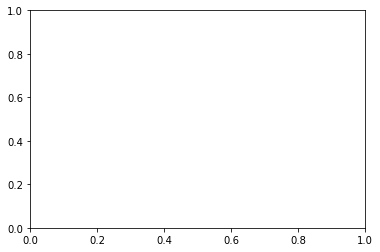

In [3]:
# Obtiene los ejes (Axes) de la figura actual (get current axes)
# (pyplot)
plt.gca() 

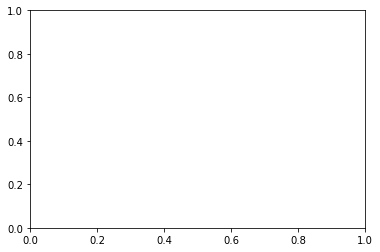

In [4]:
# Genera una subgráfica
# (pyplot)
fig, axes = plt.subplots(1)

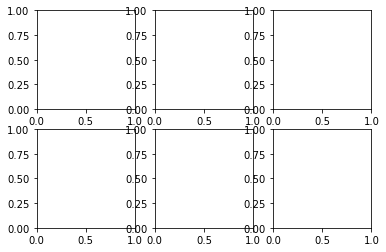

In [5]:
# Genera 6 subgráficas, arreglo de 2 renglones por tres columnas
# (pyplot)
fig, axes = plt.subplots(2,3)

### Axis
- Estos son objetos del tipo línea numerada. 
- Se encargan de configurar los límites de la gráfica y de generar las marcas sobre los ejes (*ticks*) y las etiquetas sobre esas marcas (*ticklabels*).
- El lugar donde se ponen esas marcas se determina por un objeto `Locator` y las cadenas de las etiquetas son formateadas por un objeto `Formatter`.
- La combinación de los objetos `Locator` y `Formatter` adecuados dan un control muy fino sobre el lugar de los *ticks* y sus *ticklabels*.


([<matplotlib.axis.YTick at 0x7ff2d91678e0>,
 [Text(0, 0.0, 'A'), Text(0, 1.0, 'B')])

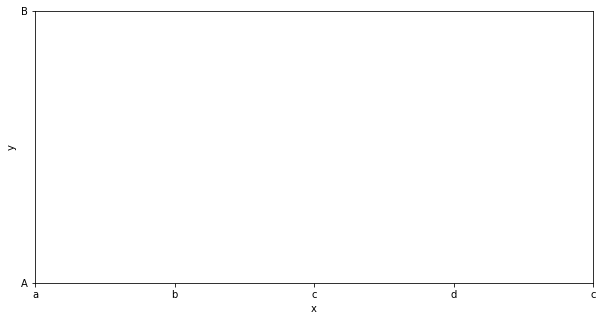

In [6]:
# Generación de las etiquetas de los ejes, los ticks y los tickslabels.
#(pyplot)
fig = plt.figure(figsize=(10,5))
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(ticks=np.linspace(0,1,5), labels=['a', 'b', 'c', 'd', 'c'])
plt.yticks(ticks=np.linspace(0,1,2), labels=['A', 'B'])

### Artist
- Todo lo que se puede ver en la figura es un *Artist*: `Figure`, `Axes` y `Axis`, `Text`, `Line2D`, `collection`, `Patch`, etc.
- Cuando una figura es producida/generada, todos los *Artist* son dibujados sobre el canvas.
- La mayoría de los *Artist* están ligados a objetos de tipo `Axes`, esos *Artist* no se pueden compartir con múltiples `Axes`, ni se pueden mover a otros `Axes`.


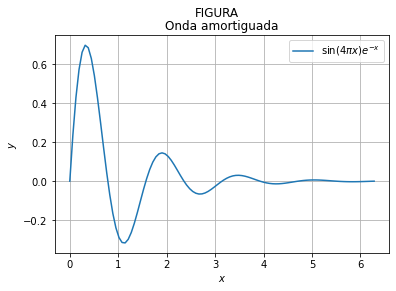

In [7]:
# Figura con una gráfica y varios Artist
# (pyplot)
x = np.linspace(0,2*np.pi,100)
y = np.sin(4*x)*np.exp(-x)
plt.figure()
plt.plot(x,y, label='$\sin(4 \pi x) e^{-x}$')
plt.suptitle('FIGURA') # título de la figura
plt.title('Onda amortiguada') # título de los ejes
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.legend()
plt.savefig('onda_amortiguada.pdf')
plt.show()

### Ejemplo 1.
Visualizar una imagen.

In [8]:
import matplotlib.image as mpimg

In [9]:
chapulin = mpimg.imread('Figuras/chapulin.jpg')

In [10]:
#print(chapulin)

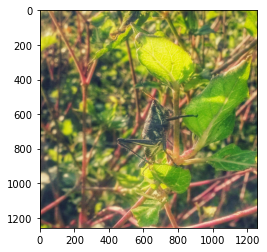

In [11]:
plt.imshow(chapulin)

In [12]:
print(type(chapulin))

<class 'numpy.ndarray'>


In [13]:
canal1_chapulin = chapulin[:,:,2]

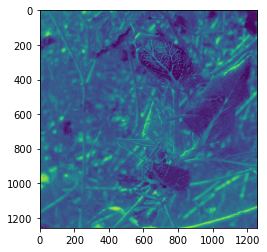

In [14]:
plt.imshow(canal1_chapulin)

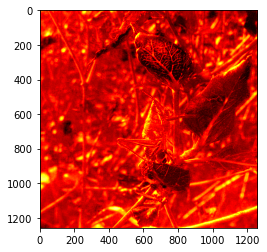

In [15]:
plt.imshow(canal1_chapulin, cmap='hot')

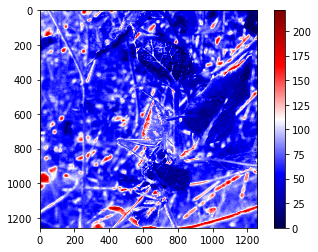

In [16]:
nueva = plt.imshow(canal1_chapulin, cmap='seismic')
plt.colorbar(nueva)

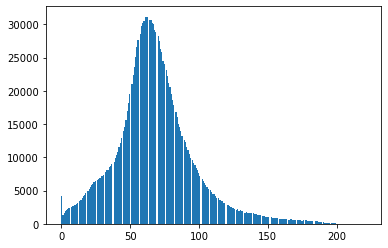

In [17]:
h = plt.hist(canal1_chapulin.ravel(), bins=256)

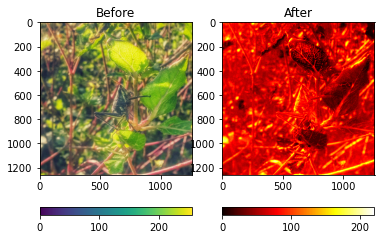

In [53]:
fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(chapulin)
ax.set_title('Before')
plt.colorbar(ticks=[0,100,200], orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(canal1_chapulin, cmap='hot')
ax.set_title('After')
plt.colorbar(ticks=[0,100,200], orientation='horizontal')

#plt.tight_layout()

### Ejemplo 2.
Dibujar las funciones $sin(x)$ , $cos(x)$ y puntos aleatorios en una sola gráfica en el dominio $(x,y) \in [0,2\pi] \times [-1,1]$.

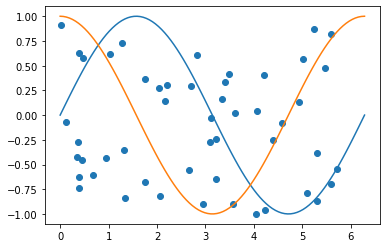

In [19]:
x = np.linspace(0,2*np.pi,100)
r = np.random.rand(2,50)
r[0] *= 2*np.pi
r[1] =  r[1] * 2 - 1

#r = np.random.rand(2,50) * np.array([2*np.pi, 2]).reshape(2,1) - np.array([0,1]).reshape(2,1)

y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, x, y2)
plt.scatter(r[0], r[1])

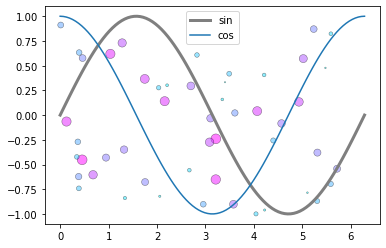

In [20]:
# Mejorando la gráfica
plt.plot(x, y1, lw = 3, c='C7', label='sin')
plt.plot(x, y2, label='cos')
area = np.random.rand(50) * 100
plt.scatter(r[0], r[1], s=area, c=area, cmap='cool', edgecolor='k', lw=0.5, alpha=0.5)
plt.legend()

### Múltiples gráficas
Realizar el ejemplo 3 pero en gráficas separadas dentro de una misma figura:
1. tres renglones.
2. tres columnas.
3. una en un renglón y dos en otro renglón.

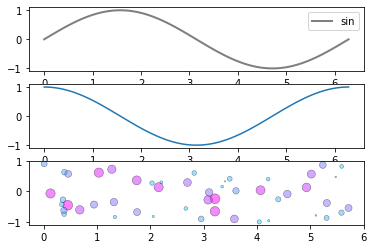

In [21]:
# 1. tres renglones
plt.subplot(311)
plt.plot(x, y1, lw = 2, c='C7', label='sin')
plt.legend()
plt.subplot(3,1,2)
plt.plot(x, y2)
plt.subplot(313)
plt.scatter(r[0], r[1], s=area, c=area, cmap='cool', edgecolor='k', lw=0.5, alpha=0.5)
#plt.tight_layout()
#plt.subplots_adjust(left=None, right=None,
#                    bottom=None, top=None, 
#                    wspace=None, hspace=0.5)


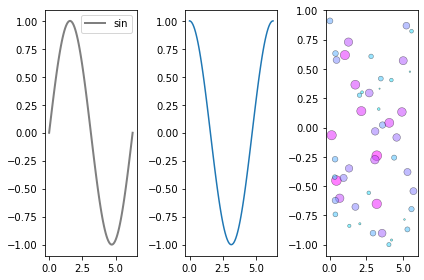

In [22]:
# 2. tres columnas
plt.subplot(131)
plt.plot(x, y1, lw = 2, c='C7', label='sin')
plt.legend()
plt.subplot(132)
plt.plot(x, y2)
plt.subplot(133)
plt.scatter(r[0], r[1], s=area, c=area, cmap='cool', edgecolor='k', lw=0.5, alpha=0.5)
plt.tight_layout()

<AxesSubplot:>

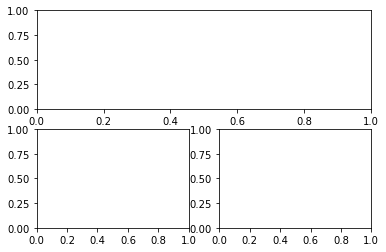

In [23]:
# 3. una en un renglón y dos en otro renglón.plt.plot(x,y)

# Agregamos un arreglo de 4 x 4 gráficas
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)

# Sobreponemos en el renglón 1 una gráfica que abarca todo el renglón
plt.subplot(2,1,1)


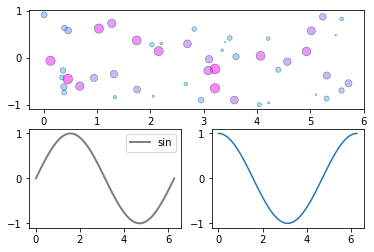

In [24]:
# Ahora agregamos las gráficas a los Axes
plt.subplot(221)
plt.subplot(222)

plt.subplot(223)
plt.plot(x, y1, lw = 2, c='C7', label='sin')
plt.legend()
plt.subplot(224)
plt.plot(x, y2)

plt.subplot(211)
plt.scatter(r[0], r[1], s=area, c=area, cmap='cool', edgecolor='k', lw=0.5, alpha=0.5)


### Tight Layout

In [25]:
def grafica(ax, fontsize=12):
    ax.scatter(r[0], r[1], s=area, c=area, cmap='cool', edgecolor='k', lw=0.5, 
               alpha=0.85, zorder=2)
    ax.plot(x, y1, ls='-', lw=5.75, zorder=1)
    ax.plot(x, y2, ls='-', lw=5.75, zorder=1)

    ax.locator_params(nbins=3) # Ticks en ambos ejes
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)

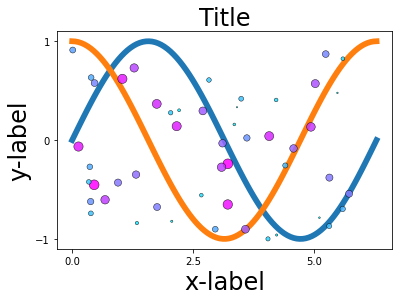

In [28]:
# Algunas veces los títulos, las etiquetas de los ejes o los ticklabels pueden
# quedar fuera de la gráfica
fig, ax = plt.subplots()
grafica(ax, fontsize=24)
#plt.tight_layout()    # Ajusta la gráfica automáticamente
plt.savefig('figura_tight.pdf')

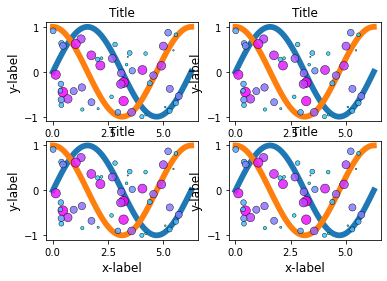

In [60]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
grafica(ax1)
grafica(ax2)
grafica(ax3)
grafica(ax4)
#plt.tight_layout() # Ajusta la gráfica automáticamente
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0, rect=[0,0,0.5,1])

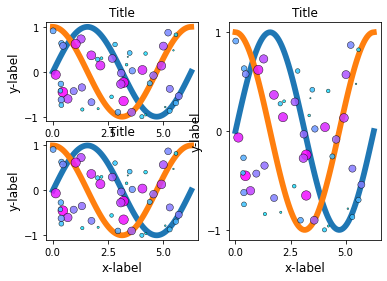

In [42]:
ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(122)

grafica(ax1)
grafica(ax2)
grafica(ax3)

#plt.tight_layout() # Ajusta la gráfica automáticamente


### Múltiples gráficas con `subplot2grid`

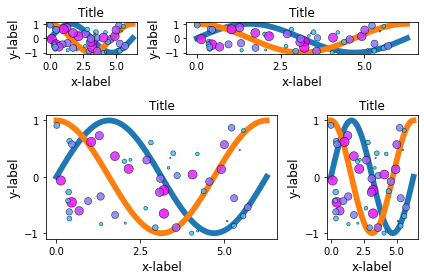

In [58]:
# (0,0) (0,1) (0,2)
# (1,0) (1,1) (1,2)
# (2,0) (2,1) (2,2)

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

grafica(ax1)
grafica(ax2)
grafica(ax3)
grafica(ax4)

plt.tight_layout()

### Múltiples gráficas con `Grispec`

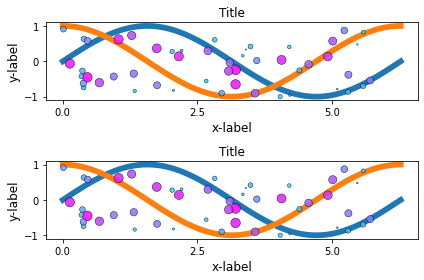

In [55]:
import matplotlib.gridspec as gridspec

plt.close('all')
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

grafica(ax1)
grafica(ax2)

gs1.tight_layout(fig)

<ipython-input-66-7a3b0456b3c2>:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs2.tight_layout(fig, rect=[0.5, 0, 1, 1], h_pad=0.5)


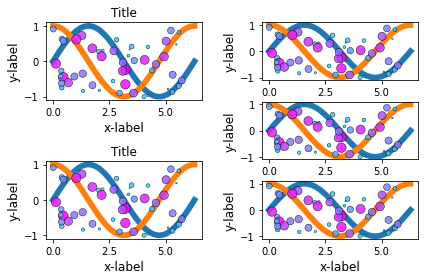

In [66]:
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

grafica(ax1)
grafica(ax2)

gs1.tight_layout(fig, rect=[0, 0, 0.5, 1])

gs2 = gridspec.GridSpec(3, 1)

for ss in gs2:
    ax = fig.add_subplot(ss)
    grafica(ax)
    ax.set_title("")
    ax.set_xlabel("")

ax.set_xlabel("x-label", fontsize=12)

gs2.tight_layout(fig, rect=[0.5, 0, 1, 1], h_pad=0.5)

# We may try to match the top and bottom of two grids ::
top = min(gs1.top, gs2.top)
bottom = max(gs1.bottom, gs2.bottom)

gs1.update(top=top, bottom=bottom)
gs2.update(top=top, bottom=bottom)
plt.show()

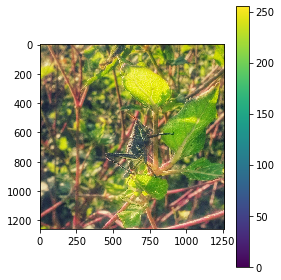

In [80]:
arr = np.arange(100).reshape((10, 10))
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(chapulin, interpolation="none")

plt.colorbar(im)

plt.tight_layout()

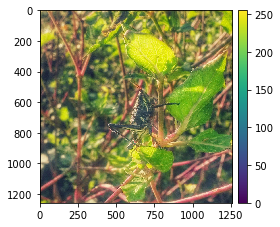

In [79]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

arr = np.arange(100).reshape((10, 10))
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(chapulin, interpolation="none")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)

plt.tight_layout()